# Import yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

#for classfication
from xgboost import XGBClassifier

# for resampling 
from imblearn.over_sampling import RandomOverSampler

# ANN Struktur
import keras
from keras.utils import np_utils
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow.keras.layers import Dense, Activation, Dropout

# for checking testing results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

# for clustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage

#for regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math

# Import Data 1

In [2]:
data=pd.read_excel("dataset ayam vs itik vs kuda.xlsx")
data

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_kelamin,populasi_itik,populasi_ayam_buras,populasi_kuda,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,JANTAN,42534,561056,245,EKOR,2010
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,BETINA,94475,757243,116,EKOR,2010
2,3,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,JANTAN,52237,1065835,38,EKOR,2010
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,BETINA,52237,456786,88,EKOR,2010
4,5,32,JAWA BARAT,3203,KABUPATEN CIANJUR,JANTAN,125106,1078857,756,EKOR,2010
...,...,...,...,...,...,...,...,...,...,...,...
635,636,32,JAWA BARAT,3277,KOTA CIMAHI,BETINA,1455,4120,4,EKOR,2021
636,637,32,JAWA BARAT,3278,KOTA TASIKMALAYA,JANTAN,19024,465823,358,EKOR,2021
637,638,32,JAWA BARAT,3278,KOTA TASIKMALAYA,BETINA,27705,265396,88,EKOR,2021
638,639,32,JAWA BARAT,3279,KOTA BANJAR,JANTAN,4836,29339,15,EKOR,2021


# Cek Info Data 1

In [3]:
#cek info data 1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   640 non-null    int64 
 1   kode_provinsi        640 non-null    int64 
 2   nama_provinsi        640 non-null    object
 3   kode_kabupaten_kota  640 non-null    int64 
 4   nama_kabupaten_kota  640 non-null    object
 5   jenis_kelamin        640 non-null    object
 6   populasi_itik        640 non-null    int64 
 7   populasi_ayam_buras  640 non-null    int64 
 8   populasi_kuda        640 non-null    int64 
 9   satuan               640 non-null    object
 10  tahun                640 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 55.1+ KB


In [4]:
#melihat deskripsi statistik
data.describe()

,id,kode_provinsi,kode_kabupaten_kota,populasi_itik,populasi_ayam_buras,populasi_kuda,tahun
count,640.000000,640.0,640.000000,6.400000e+02,6.400000e+02,640.000000,640.000000
mean,320.500000,32.0,3231.500000,1.580192e+05,4.722836e+05,216.028125,2015.550000
std,184.896367,0.0,31.384934,3.065732e+05,5.075187e+05,396.138362,3.444712
min,1.000000,32.0,3201.000000,0.000000e+00,0.000000e+00,0.000000,2010.000000
25%,160.750000,32.0,3207.000000,4.690000e+03,3.371250e+04,14.000000,2013.000000
50%,320.500000,32.0,3214.000000,3.996600e+04,3.597170e+05,59.000000,2016.000000
75%,480.250000,32.0,3273.000000,1.811615e+05,7.149248e+05,194.000000,2019.000000
max,640.000000,32.0,3279.000000,2.834763e+06,2.849936e+06,2086.000000,2021.000000


In [5]:
#menghilangkan variabel yang tidak dibutuhkan
data1=data.drop(columns=['id'], inplace=False,axis=1)
data1=data1.drop(columns=['nama_provinsi'], inplace=False,axis=1)
data1=data1.drop(columns=['kode_provinsi'], inplace=False,axis=1)
data1=data1.drop(columns=['kode_kabupaten_kota'], inplace=False,axis=1)
data1=data1.drop(columns=['tahun'], inplace=False,axis=1)

In [6]:
data1

,nama_kabupaten_kota,jenis_kelamin,populasi_itik,populasi_ayam_buras,populasi_kuda,satuan
0,KABUPATEN BOGOR,JANTAN,42534,561056,245,EKOR
1,KABUPATEN BOGOR,BETINA,94475,757243,116,EKOR
2,KABUPATEN SUKABUMI,JANTAN,52237,1065835,38,EKOR
3,KABUPATEN SUKABUMI,BETINA,52237,456786,88,EKOR
4,KABUPATEN CIANJUR,JANTAN,125106,1078857,756,EKOR
...,...,...,...,...,...,...
635,KOTA CIMAHI,BETINA,1455,4120,4,EKOR
636,KOTA TASIKMALAYA,JANTAN,19024,465823,358,EKOR
637,KOTA TASIKMALAYA,BETINA,27705,265396,88,EKOR
638,KOTA BANJAR,JANTAN,4836,29339,15,EKOR


In [7]:
#melabeli data yang ada di variabel kategorik menjadi numerik
data1[['nama_kabupaten_kota', 'jenis_kelamin']] = data1[['nama_kabupaten_kota', 'jenis_kelamin']].apply(LabelEncoder().fit_transform)

#view udpated DataFr
data1

,nama_kabupaten_kota,jenis_kelamin,populasi_itik,populasi_ayam_buras,populasi_kuda,satuan
0,3,1,42534,561056,245,EKOR
1,3,0,94475,757243,116,EKOR
2,15,1,52237,1065835,38,EKOR
3,15,0,52237,456786,88,EKOR
4,5,1,125106,1078857,756,EKOR
...,...,...,...,...,...,...
635,22,0,1455,4120,4,EKOR
636,26,1,19024,465823,358,EKOR
637,26,0,27705,265396,88,EKOR
638,19,1,4836,29339,15,EKOR


# Visualisasi Data 1

<AxesSubplot: >

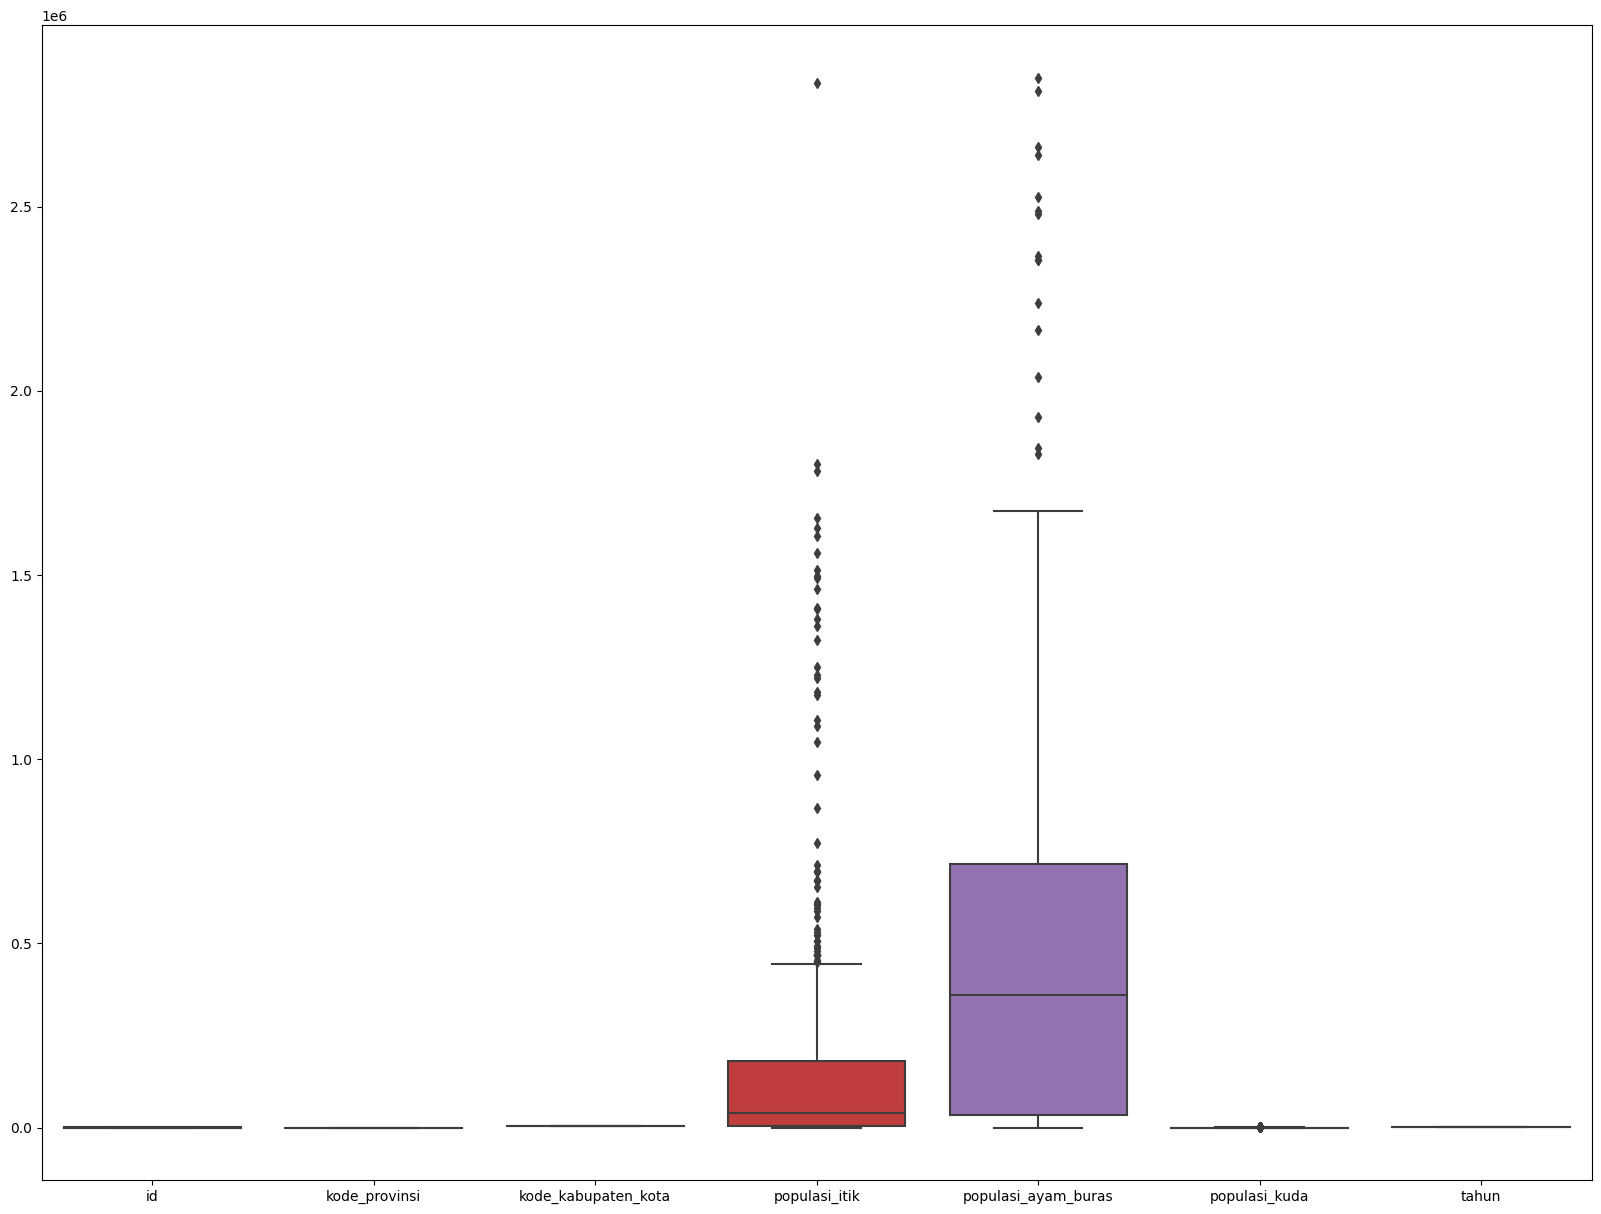

In [8]:
#visualisasi data dengan boxplot
plt.figure(figsize=(20,15))
sns.boxplot(data=data)

In [9]:
#menghilangkan variabel yang tidak dibutuhkan
data11=data.drop(columns=['id'], inplace=False,axis=1)
data11=data11.drop(columns=['nama_provinsi'], inplace=False,axis=1)
data11=data11.drop(columns=['kode_provinsi'], inplace=False,axis=1)
data11=data11.drop(columns=['kode_kabupaten_kota'], inplace=False,axis=1)
data11=data11.drop(columns=['nama_kabupaten_kota'], inplace=False,axis=1)
data11=data11.drop(columns=['tahun'], inplace=False,axis=1)

<AxesSubplot: ylabel='jumlah ternak'>

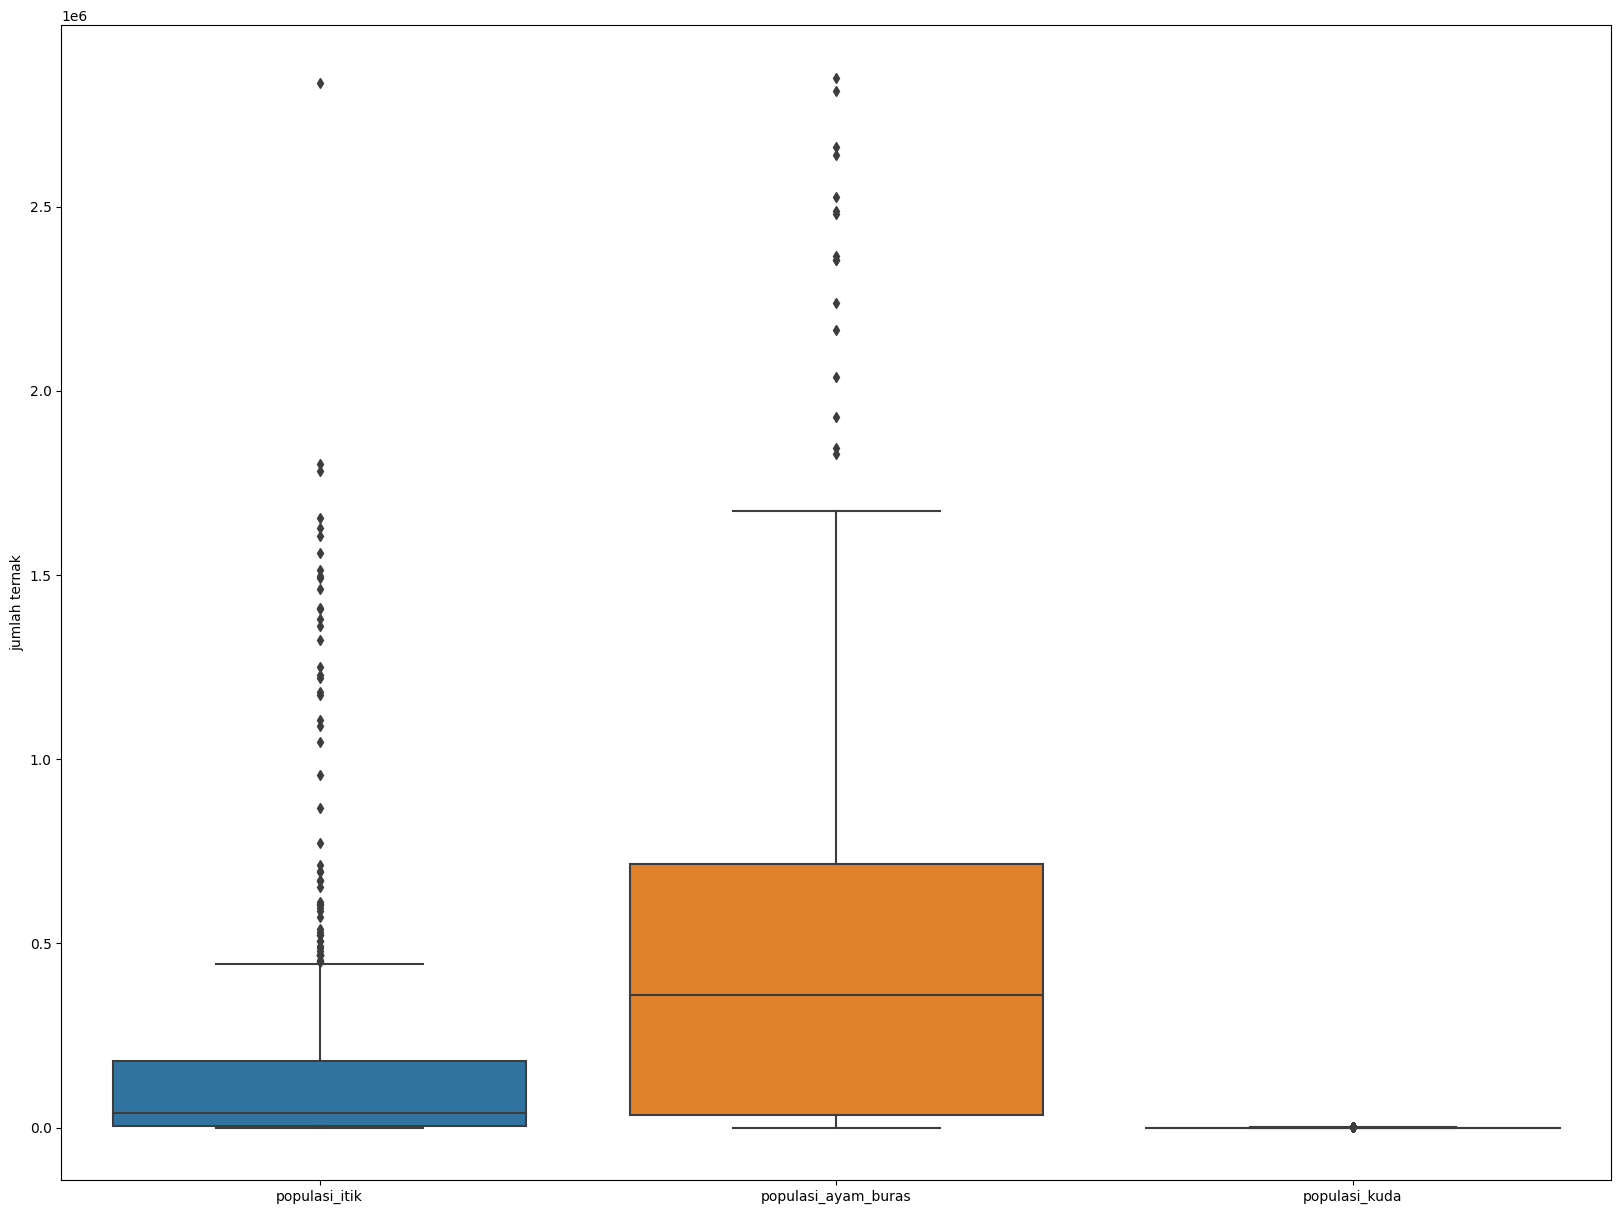

In [10]:
#visualisasi data dengan boxplot
plt.figure(figsize=(20,15))
plt.ylabel('jumlah ternak',fontsize=10)
sns.boxplot(data=data11)

Text(-21.180555555555557, 0.5, 'populasi_itik (ekor)')

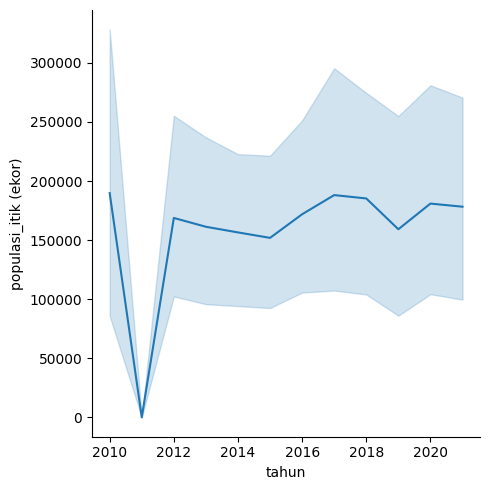

In [11]:
#visualisasi dengan line graph antar tahun dan populasi_itik
sb.relplot(data=data, x='tahun', y='populasi_itik', kind='line')
plt.ylabel("populasi_itik (ekor)")

Text(5.069444444444445, 0.5, 'populasi_kuda (ekor)')

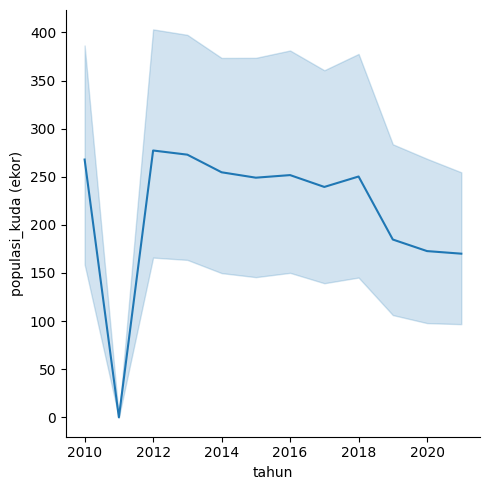

In [12]:
#visualisasi dengan line graph antar tahun dan populasi_kuda
sb.relplot(data=data, x='tahun', y='populasi_kuda', kind='line')
plt.ylabel("populasi_kuda (ekor)")

Text(-21.180555555555557, 0.5, 'populasi_ayam_buras (ekor)')

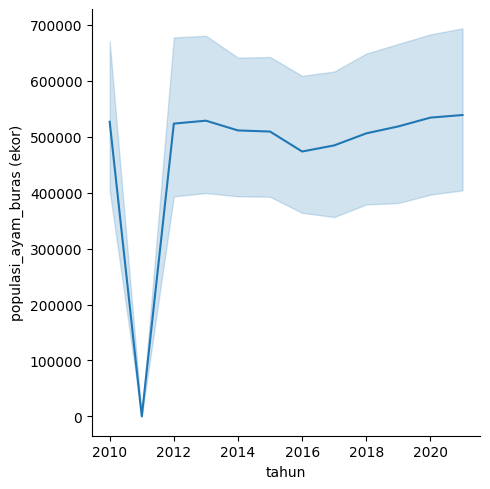

In [13]:
#visualisasi dengan line graph antar tahun dan populasi_ayam buras
sb.relplot(data=data, x='tahun', y='populasi_ayam_buras', kind='line')
plt.ylabel("populasi_ayam_buras (ekor)")

# Import Data 2

In [14]:
data2=pd.read_excel("Dry_Bean_Dataset.xlsx")
data2

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,1,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,2,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,3,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,4,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,5,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,13607,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,13608,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,13609,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,13610,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


# Cek Info Data 2

In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bean ID          13611 non-null  int64  
 1   Area             13611 non-null  int64  
 2   Perimeter        13611 non-null  float64
 3   MajorAxisLength  13611 non-null  float64
 4   MinorAxisLength  13611 non-null  float64
 5   AspectRation     13611 non-null  float64
 6   Eccentricity     13611 non-null  float64
 7   ConvexArea       13611 non-null  int64  
 8   EquivDiameter    13611 non-null  float64
 9   Extent           13611 non-null  float64
 10  Solidity         13611 non-null  float64
 11  roundness        13611 non-null  float64
 12  Compactness      13611 non-null  float64
 13  ShapeFactor1     13611 non-null  float64
 14  ShapeFactor2     13611 non-null  float64
 15  ShapeFactor3     13611 non-null  float64
 16  ShapeFactor4     13611 non-null  float64
 17  Class       

# Deskripsi Statistik Data 2

In [16]:
data2.describe()

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,6806.000000,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,3929.301592,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,1.000000,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,3403.500000,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,6806.000000,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,10208.500000,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,13611.000000,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [17]:
#menghilangkan variabel yang tidak dibutuhkan
data3=data2.drop(columns=['Bean ID'], inplace=False,axis=1)

In [18]:
#melabelkan data output
data3[['Class']] = data2[['Class']].apply(LabelEncoder().fit_transform)

In [19]:
data3

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


# Visualisasi Data 2

<AxesSubplot: >

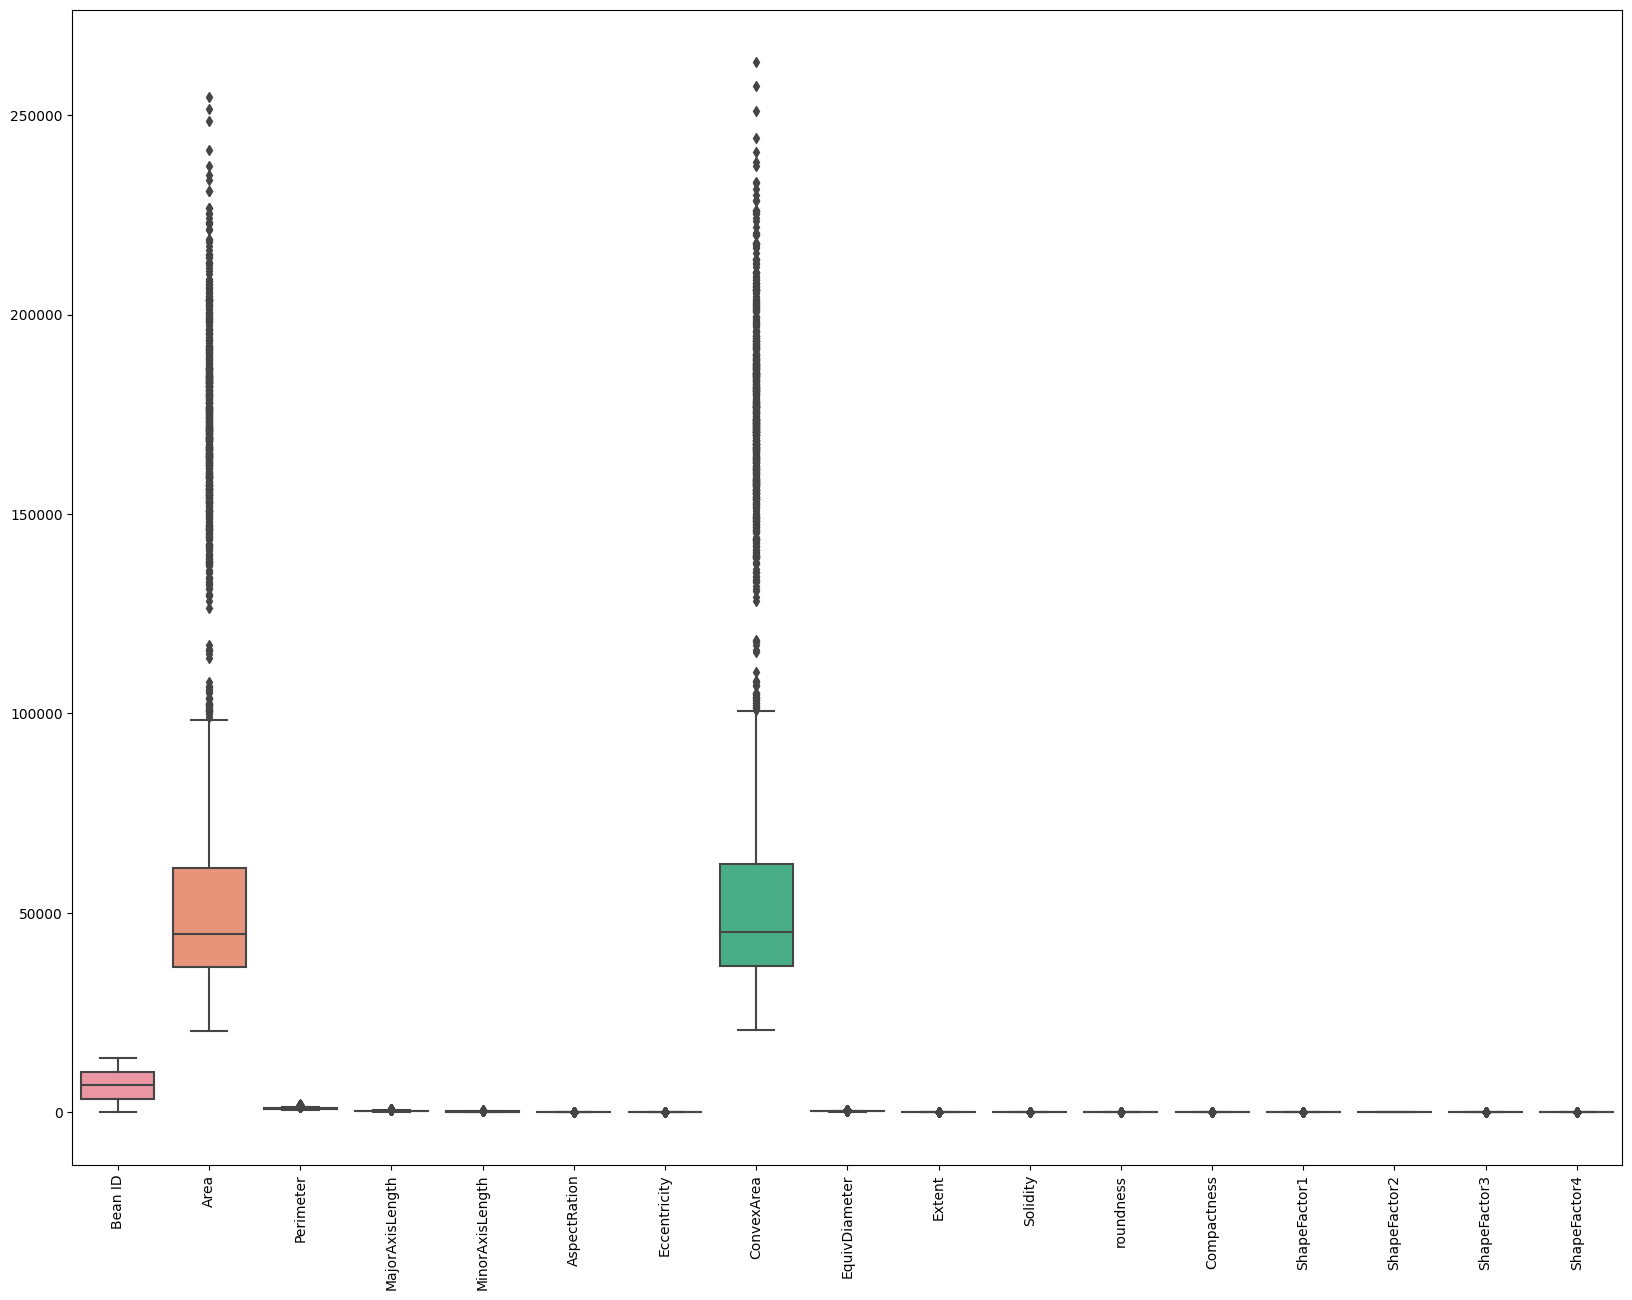

In [20]:
#visualisasi data dengan boxplot
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
sns.boxplot(data=data2)

(array([0]), [Text(0, 0, '0')])

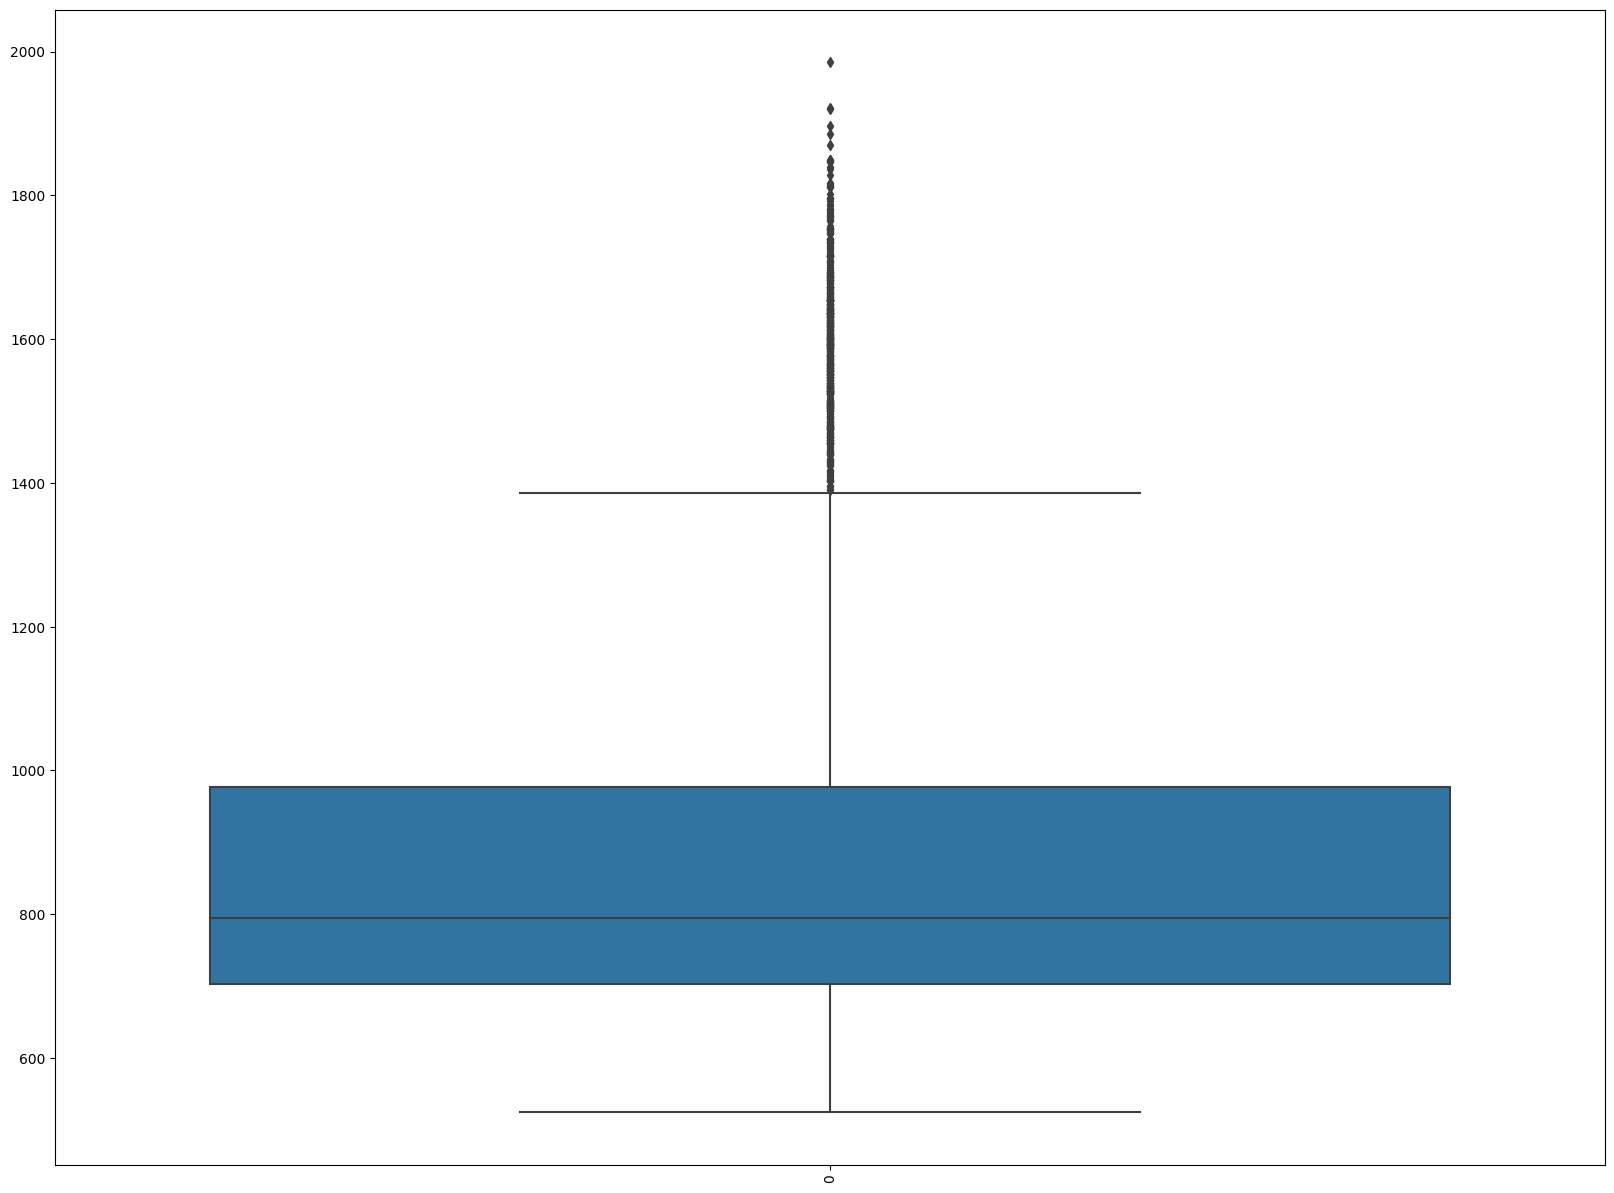

In [21]:
#visualisasi data dengan boxplot
plt.figure(figsize=(20,15))
sns.boxplot(data=data2['Perimeter'])
plt.xticks(rotation=90)

Text(0.5694444444444446, 0.5, 'Solidity')

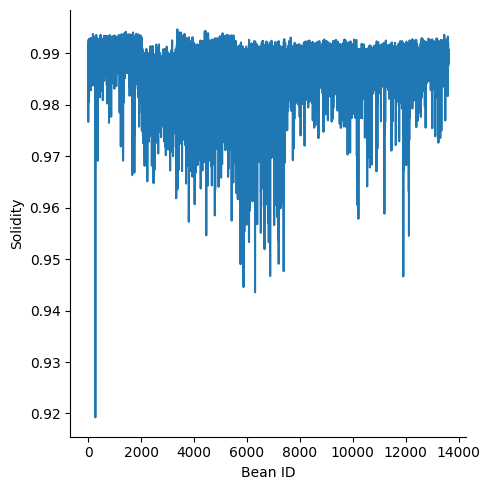

In [22]:
#visualisasi dengan line graph antar bean id dan Solidity
sb.relplot(data=data2, x='Bean ID', y='Solidity', kind='line')
plt.ylabel("Solidity")

Text(-21.180555555555557, 0.5, 'Area')

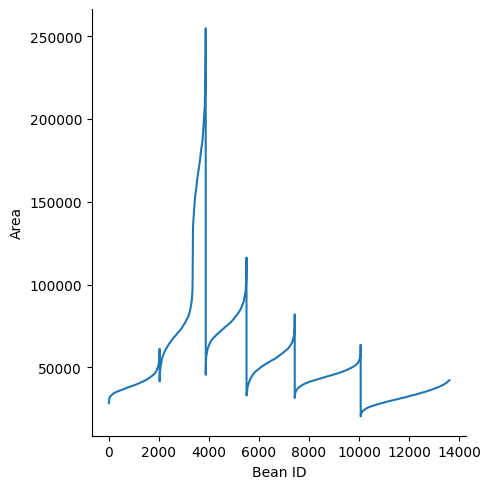

In [23]:
#visualisasi dengan line graph antar bean id dan Area
sb.relplot(data=data2, x='Bean ID', y='Area', kind='line')
plt.ylabel("Area")

# Prepocessing Data 1 untuk klastering

In [24]:
#cek missing value
data.isnull().sum()

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jenis_kelamin          0
populasi_itik          0
populasi_ayam_buras    0
populasi_kuda          0
satuan                 0
tahun                  0
dtype: int64

In [25]:
#menghilangkan variabel yang tidak dibutuhkan
data=data.drop(columns=['id'], inplace=False,axis=1)
data=data.drop(columns=['nama_provinsi'], inplace=False,axis=1)
data=data.drop(columns=['kode_provinsi'], inplace=False,axis=1)
data=data.drop(columns=['kode_kabupaten_kota'], inplace=False,axis=1)

In [26]:
data

,nama_kabupaten_kota,jenis_kelamin,populasi_itik,populasi_ayam_buras,populasi_kuda,satuan,tahun
0,KABUPATEN BOGOR,JANTAN,42534,561056,245,EKOR,2010
1,KABUPATEN BOGOR,BETINA,94475,757243,116,EKOR,2010
2,KABUPATEN SUKABUMI,JANTAN,52237,1065835,38,EKOR,2010
3,KABUPATEN SUKABUMI,BETINA,52237,456786,88,EKOR,2010
4,KABUPATEN CIANJUR,JANTAN,125106,1078857,756,EKOR,2010
...,...,...,...,...,...,...,...
635,KOTA CIMAHI,BETINA,1455,4120,4,EKOR,2021
636,KOTA TASIKMALAYA,JANTAN,19024,465823,358,EKOR,2021
637,KOTA TASIKMALAYA,BETINA,27705,265396,88,EKOR,2021
638,KOTA BANJAR,JANTAN,4836,29339,15,EKOR,2021


In [27]:
#transformasi data variabel "populasi_itik" dengan MinMaxScaler
columns = ['populasi_itik']
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data[columns])
#Memasukan variabel "populasi_itik" yang telah transformasi data ke data aktual
data["populasi_itik"]=data_scale

#transformasi data variabel "populasi_ayam_buras" dengan MinMaxScaler
columns = ['populasi_ayam_buras']
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data[columns])
#Memasukan variabel "populasi_ayam_buras" yang telah transformasi data ke data aktual
data["populasi_ayam_buras"]=data_scale

#transformasi data variabel "populasi_kuda" dengan MinMaxScaler
columns = ['populasi_kuda']
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data[columns])
#Memasukan variabel "populasi_kuda" yang telah transformasi data ke data aktual
data["populasi_kuda"]=data_scale

In [28]:
#melabeli data yang ada di variabel kategorik menjadi numerik
data[['nama_kabupaten_kota', 'jenis_kelamin']] = data[['nama_kabupaten_kota', 'jenis_kelamin']].apply(LabelEncoder().fit_transform)

#view udpated DataFr
data

,nama_kabupaten_kota,jenis_kelamin,populasi_itik,populasi_ayam_buras,populasi_kuda,satuan,tahun
0,3,1,0.015004,0.196866,0.117450,EKOR,2010
1,3,0,0.033327,0.265705,0.055609,EKOR,2010
2,15,1,0.018427,0.373986,0.018217,EKOR,2010
3,15,0,0.018427,0.160279,0.042186,EKOR,2010
4,5,1,0.044133,0.378555,0.362416,EKOR,2010
...,...,...,...,...,...,...,...
635,22,0,0.000513,0.001446,0.001918,EKOR,2021
636,26,1,0.006711,0.163450,0.171620,EKOR,2021
637,26,0,0.009773,0.093123,0.042186,EKOR,2021
638,19,1,0.001706,0.010295,0.007191,EKOR,2021


# Prepocessing Data 2 untuk Klasifikasi

In [29]:
#cek missing value
data2.isnull().sum()

Bean ID            0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [30]:
#menghilangkan variabel yang tidak dibutuhkan
data2=data2.drop(columns=['Bean ID'], inplace=False,axis=1)

In [31]:
data2

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [32]:
#menghitung jumlah output
data2.Class.value_counts().sort_values(ascending = False)

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [33]:
#melabelkan data output
data2[['Class']] = data2[['Class']].apply(LabelEncoder().fit_transform)

#view udpated DataFrame
print(data2)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.54981

In [34]:
#feature selection data and split data
X = data2.drop(columns='Class')
y = data2.Class

In [35]:
#data traing 90% dan data testing 10% before random oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=200)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12249, 16), (1362, 16), (12249,), (1362,))

In [36]:
#Transformasi/normalisasi data dengan MinMax before resampling
columns = ['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','ConvexArea','EquivDiameter']
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train[columns])
X_test_scale = scaler.transform(X_test[columns])

In [37]:
X_train[columns]=X_train_scale
X_test[columns]=X_test_scale

In [38]:
#resampling
oversample = RandomOverSampler(sampling_strategy='auto')

X_ros, y_ros = oversample.fit_resample(X, y)

In [39]:
y_ros.value_counts()

5    3546
0    3546
1    3546
2    3546
4    3546
6    3546
3    3546
Name: Class, dtype: int64

In [40]:
#data traing 90% dan data testing 10% after random oversampling
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_ros, y_ros, test_size=0.1, random_state=200)
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((22339, 16), (2483, 16), (22339,), (2483,))

In [41]:
#Transformasi/normalisasi data dengan MinMax after resampling
columns = ['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','ConvexArea','EquivDiameter']
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train1[columns])
X_test_scale = scaler.transform(X_test1[columns])

In [42]:
X_train1[columns]=X_train_scale
X_test1[columns]=X_test_scale

# Prepocessing Data 2 untuk Regresi

In [43]:
#import data 2 untuk regresi
data21=pd.read_excel("Dry_Bean_Dataset.xlsx")
data21

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,1,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,2,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,3,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,4,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,5,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,13607,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,13608,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,13609,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,13610,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [44]:
#cek missing value
data21.isnull().sum()

Bean ID            0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [45]:
#menghilangkan variabel yang tidak dibutuhkan
data21=data21.drop(columns=['Bean ID'], inplace=False,axis=1)
data21

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [46]:
#menghitung jumlah output
data21.Class.value_counts().sort_values(ascending = False)

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [47]:
#melabelkan data output
data21[['Class']] = data21[['Class']].apply(LabelEncoder().fit_transform)

#view udpated DataFrame
data21

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


In [48]:
#feature selection data and split data
X21 = data21.drop(columns='Class')
y21 = data21.Class

In [49]:
#data traing 90% dan data testing 10% before random oversampling
X_train21, X_test21, y_train21, y_test21 = train_test_split(X21, y21, test_size=0.1, random_state=200)
X_train21.shape, X_test21.shape, y_train21.shape, y_test21.shape

((12249, 16), (1362, 16), (12249,), (1362,))

In [50]:
#resampling
oversample = RandomOverSampler(sampling_strategy='auto')

X_ros21, y_ros21 = oversample.fit_resample(X21, y21)

In [51]:
y_ros21.value_counts()

5    3546
0    3546
1    3546
2    3546
4    3546
6    3546
3    3546
Name: Class, dtype: int64

In [52]:
#data traing 90% dan data testing 10% after random oversampling
X_train211, X_test211, y_train211, y_test211 = train_test_split(X_ros21, y_ros21, test_size=0.1, random_state=200)
X_train211.shape, X_test211.shape, y_train211.shape, y_test211.shape

((22339, 16), (2483, 16), (22339,), (2483,))

# Membuat Model Klastering Data 1 dengan KMeans

In [53]:
features1= data.iloc[:, [2,3,4]].values
features1 = np.asarray(features1)
print(features1)

[[0.01500443 0.19686618 0.11744966]
 [0.0333273  0.26570526 0.05560882]
 [0.01842729 0.37398559 0.01821668]
 ...
 [0.0097733  0.09312349 0.042186  ]
 [0.00170596 0.01029462 0.0071908 ]
 [0.00207742 0.01258309 0.00239693]]


Text(0.5, 0, 'n_clusters')

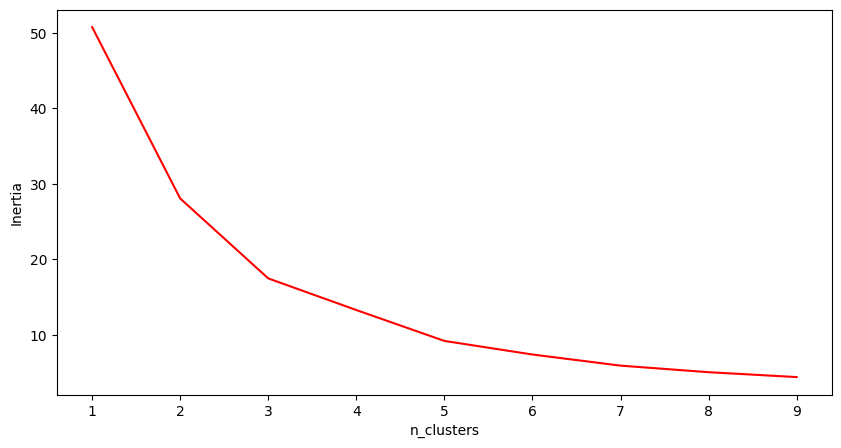

In [54]:
# Mententukan jumlah k cluster dengan Elbow Analysis
ScoreElbow = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    label = kmeans.fit_predict(features1)
    
    ScoreElbow.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1, 10), ScoreElbow, 'r-')
plt.ylabel('Inertia')
plt.xlabel('n_clusters')

Text(0.5, 0, 'n_clusters')

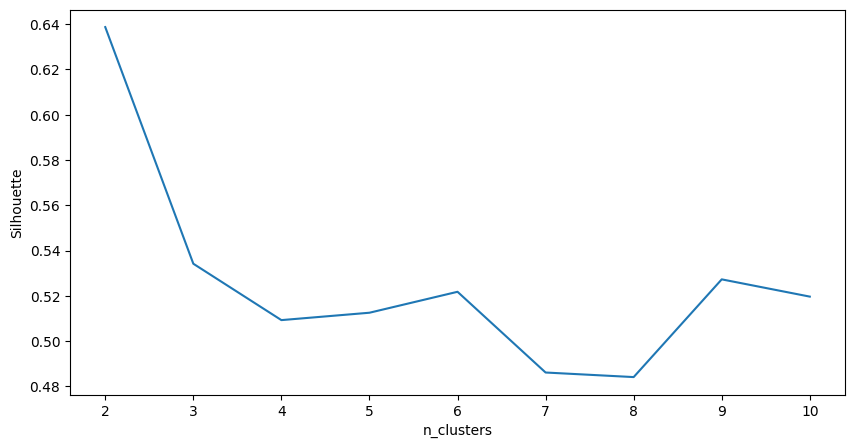

In [55]:
from sklearn.metrics import silhouette_score
score = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    label = kmeans.fit_predict(features1)
    
    siluet = silhouette_score(features1, label, metric='euclidean')
    score.append(siluet)
    
plt.figure(figsize=(10,5))
plt.plot(range(2, 11), score)
plt.ylabel('Silhouette')
plt.xlabel('n_clusters')

In [56]:
kmeans = KMeans(n_clusters=3,init='k-means++',
               max_iter=300,n_init=10, random_state=0)
pred_y = kmeans.fit_predict(features1)
data['cluster'] = pd.DataFrame(pred_y)
data

,nama_kabupaten_kota,jenis_kelamin,populasi_itik,populasi_ayam_buras,populasi_kuda,satuan,tahun,cluster
0,3,1,0.015004,0.196866,0.117450,EKOR,2010,1
1,3,0,0.033327,0.265705,0.055609,EKOR,2010,0
2,15,1,0.018427,0.373986,0.018217,EKOR,2010,0
3,15,0,0.018427,0.160279,0.042186,EKOR,2010,1
4,5,1,0.044133,0.378555,0.362416,EKOR,2010,2
...,...,...,...,...,...,...,...,...
635,22,0,0.000513,0.001446,0.001918,EKOR,2021,1
636,26,1,0.006711,0.163450,0.171620,EKOR,2021,1
637,26,0,0.009773,0.093123,0.042186,EKOR,2021,1
638,19,1,0.001706,0.010295,0.007191,EKOR,2021,1


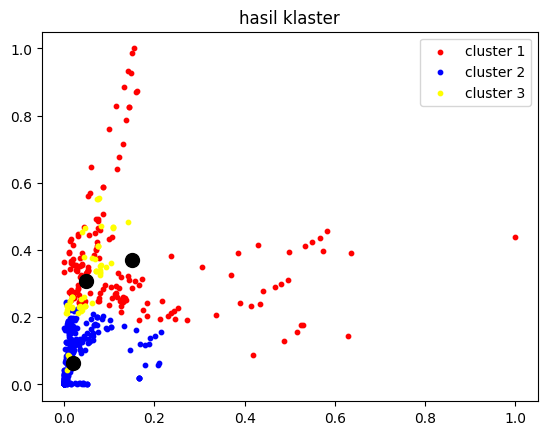

In [57]:
plt.scatter(features1[pred_y==0,0],features1[pred_y==0,1],
            s=10,c='red',label='cluster 1')
plt.scatter(features1[pred_y==1,0],features1[pred_y==1,1],
            s=10,c='blue',label='cluster 2')
plt.scatter(features1[pred_y==2,0],features1[pred_y==2,1],
            s=10,c='yellow',label='cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], s=100, c="black")
plt.title("hasil klaster")
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score: {silhouette_score(features1, pred_y)}')

Silhouette Score: 0.5341698396390238


# Membuat Model Klasifikasi Data 2 dengan XGboost tanpa ROS

In [59]:
seed=123
np.random.seed(seed)

In [60]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [61]:
xgb_pred = xgb.predict(X_test)
xgb_pred

array([4, 5, 5, ..., 6, 3, 2], dtype=int64)

In [62]:
y_test

6512     4
13599    3
893      5
2328     0
7424     4
        ..
4904     2
2102     0
7587     6
7485     6
4469     2
Name: Class, Length: 1362, dtype: int32

In [63]:
print ('accuracy_score: ',accuracy_score(y_test, xgb_pred))
print ('f1_score: ',f1_score(y_test, xgb_pred, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(y_test, xgb_pred, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(y_test, xgb_pred, pos_label='positive', average='micro'))

accuracy_score:  0.92143906020558
f1_score:  0.92143906020558
recall_score:  0.92143906020558
precision_score:  0.92143906020558


In [64]:
cm = confusion_matrix(y_test, xgb_pred)
cm

array([[101,   0,   7,   0,   0,   0,   2],
       [  0,  49,   0,   0,   0,   0,   0],
       [  5,   0, 144,   0,   4,   0,   3],
       [  0,   0,   0, 313,   0,   3,  15],
       [  1,   0,   3,   1, 181,   0,   6],
       [  2,   0,   0,   4,   0, 229,   8],
       [  4,   0,   1,  32,   3,   3, 238]], dtype=int64)

In [65]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       110
           1       1.00      1.00      1.00        49
           2       0.93      0.92      0.93       156
           3       0.89      0.95      0.92       331
           4       0.96      0.94      0.95       192
           5       0.97      0.94      0.96       243
           6       0.88      0.85      0.86       281

    accuracy                           0.92      1362
   macro avg       0.93      0.93      0.93      1362
weighted avg       0.92      0.92      0.92      1362



# Membuat Model Klasifikasi Data 2 dengan XGboost dengan ROS

In [66]:
seed=123
np.random.seed(seed)

In [67]:
xgb1 = XGBClassifier()
xgb1.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [68]:
xgb_pred1 = xgb1.predict(X_test1)
xgb_pred1

array([1, 6, 4, ..., 0, 3, 1], dtype=int64)

In [69]:
y_test1

3372     1
24550    6
6074     4
21899    4
23124    5
        ..
14875    0
11214    3
9569     6
11198    3
18102    1
Name: Class, Length: 2483, dtype: int32

In [70]:
print ('accuracy_score: ',accuracy_score(y_test1, xgb_pred1))
print ('f1_score: ',f1_score(y_test1, xgb_pred1, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(y_test1, xgb_pred1, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(y_test1, xgb_pred1, pos_label='positive', average='micro'))

accuracy_score:  0.9722110350382601
f1_score:  0.9722110350382601
recall_score:  0.9722110350382601
precision_score:  0.9722110350382601


In [71]:
cm = confusion_matrix(y_test1, xgb_pred1)
cm

array([[326,   0,   2,   0,   1,   2,   1],
       [  0, 377,   0,   0,   0,   0,   0],
       [  1,   0, 355,   0,   2,   0,   0],
       [  0,   0,   0, 342,   1,   1,  25],
       [  0,   0,   0,   0, 345,   0,   1],
       [  2,   0,   0,   3,   0, 322,   2],
       [  1,   0,   0,  24,   0,   0, 347]], dtype=int64)

In [72]:
print(classification_report(y_test1, xgb_pred1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       332
           1       1.00      1.00      1.00       377
           2       0.99      0.99      0.99       358
           3       0.93      0.93      0.93       369
           4       0.99      1.00      0.99       346
           5       0.99      0.98      0.98       329
           6       0.92      0.93      0.93       372

    accuracy                           0.97      2483
   macro avg       0.97      0.97      0.97      2483
weighted avg       0.97      0.97      0.97      2483



# Membuat Model Regresi Data 2 tanpa ROS

In [73]:
seed=123
np.random.seed(seed)

In [74]:
logreg=LogisticRegression(multi_class="auto")
logreg.fit(X_train21, y_train21)

LogisticRegression()

In [75]:
print("coefficents :",logreg.coef_ )
print("intercept :", logreg.intercept_)

coefficents : [[-7.09656885e-03 -1.40543305e-02 -1.18598340e-02 -3.12316283e-03
  -1.16533430e-04 -4.72872825e-05  7.42820076e-03 -6.34742797e-03
  -3.95242834e-05 -5.41493848e-05 -6.02240986e-05 -3.69271028e-05
  -6.00190223e-07 -1.16870071e-07 -2.50509439e-05 -5.33185566e-05]
 [-3.70859336e-03 -7.19784257e-02 -2.70067535e-02 -1.70980053e-02
  -2.13452863e-04 -1.00228366e-04  4.89772927e-03 -2.13609254e-02
  -9.97125094e-05 -1.33264586e-04 -1.18542385e-04 -1.08342467e-04
  -1.06984445e-06 -2.82741180e-07 -8.76638471e-05 -1.34479267e-04]
 [-4.92367270e-03 -2.76493294e-02 -5.55274632e-03 -9.12132054e-03
  -7.25044935e-05 -3.66969246e-05  5.47828109e-03 -7.97330138e-03
  -4.81682410e-05 -6.79224962e-05 -6.04185292e-05 -6.51511786e-05
  -6.19982589e-07 -2.34647316e-07 -6.08973519e-05 -6.93977087e-05]
 [ 8.28423328e-03  6.32327617e-02  2.34482513e-02  1.75594013e-02
   2.37066991e-04  1.29107678e-04 -9.59074853e-03  2.06190118e-02
   1.26357762e-04  1.66313480e-04  1.60270476e-04  1.388169

In [76]:
logreg.predict_proba(X_test21)[0:5]

array([[2.05272322e-02, 1.88138787e-12, 4.43122710e-03, 1.56052254e-04,
        8.17629128e-01, 4.40546205e-04, 1.56815814e-01],
       [2.01813513e-03, 1.98938769e-11, 5.60847206e-04, 4.00961449e-02,
        9.72981898e-03, 7.46836703e-01, 2.00758351e-01],
       [9.66513240e-04, 4.64434982e-12, 1.73349619e-04, 1.98273157e-01,
        8.55277039e-03, 5.87362015e-01, 2.04672195e-01],
       [6.60893695e-01, 2.67046765e-09, 1.46429760e-01, 3.32013182e-09,
        1.83519147e-01, 8.20760574e-06, 9.14918471e-03],
       [1.58585848e-01, 4.75579632e-08, 8.22505713e-01, 2.05168155e-10,
        1.01545368e-02, 3.21032477e-03, 5.54352890e-03]])

In [77]:
prediksiMLR=logreg.predict(X_test21)

In [78]:
print('accuracy_score: ',accuracy_score(y_test21, prediksiMLR))
print('f1_score: ',f1_score(y_test21, prediksiMLR, pos_label='positive', average='micro'))
print('recall_score: ',recall_score(y_test21, prediksiMLR, pos_label='positive', average='micro'))
print('precision_score: ',precision_score(y_test21, prediksiMLR, pos_label='positive', average='micro'))
print("mean squared error (MSE) : %.2f "% mean_squared_error(y_test21, prediksiMLR))
print("mean absolute error (MAE) : %.2f "% mean_absolute_error(y_test21, prediksiMLR))
print("roots mean squared error (RMSE) : %.2f "% math.sqrt(mean_squared_error(y_test21, prediksiMLR)))
print("r2_score : %.2f "% r2_score(y_test21, prediksiMLR))

accuracy_score:  0.6967694566813509
f1_score:  0.6967694566813509
recall_score:  0.6967694566813509
precision_score:  0.6967694566813509
mean squared error (MSE) : 1.38 
mean absolute error (MAE) : 0.60 
roots mean squared error (RMSE) : 1.17 
r2_score : 0.57 


In [79]:
#evaluasi model klasifikasi dengan confusion matrix
print(classification_report(y_test21, prediksiMLR))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54       110
           1       1.00      0.98      0.99        49
           2       0.70      0.69      0.70       156
           3       0.79      0.88      0.84       331
           4       0.59      0.61      0.60       192
           5       0.72      0.62      0.66       243
           6       0.62      0.63      0.63       281

    accuracy                           0.70      1362
   macro avg       0.71      0.70      0.71      1362
weighted avg       0.69      0.70      0.69      1362



# Membuat Model Regresi Data 2 dengan ROS

In [80]:
seed=123
np.random.seed(seed)

In [81]:
logreg1=LogisticRegression(multi_class="auto")
logreg1.fit(X_train211, y_train211)

LogisticRegression()

In [82]:
print("coefficents :",logreg1.coef_ )
print("intercept :", logreg1.intercept_)

coefficents : [[-9.47115208e-03  5.62949694e-03 -6.04199897e-03  1.64067451e-03
  -7.71746520e-05 -2.57828377e-05  9.41201427e-03 -9.79456172e-04
  -1.67339872e-05 -2.46110788e-05 -3.64465453e-05 -1.12813463e-05
  -4.04216799e-07 -5.72913423e-08 -3.40454037e-06 -2.32090956e-05]
 [ 2.91022206e-03 -1.13892565e-01 -4.27972596e-02 -2.57719027e-02
  -3.26969716e-04 -1.51355601e-04 -1.03685395e-03 -3.29857051e-02
  -1.46905531e-04 -1.97270197e-04 -1.70732497e-04 -1.58111999e-04
  -1.53143940e-06 -3.86581742e-07 -1.26133135e-04 -1.99178486e-04]
 [-6.59052296e-03 -1.25190566e-02  9.84667443e-04 -5.94101266e-03
  -2.41372702e-05 -1.33053644e-05  6.83275809e-03 -3.39366880e-03
  -2.74307206e-05 -4.10291844e-05 -3.60229713e-05 -4.50023619e-05
  -4.03656856e-07 -1.90754794e-07 -4.61749493e-05 -4.23969766e-05]
 [ 4.31869980e-03  4.48341491e-02  1.63124586e-02  1.28327572e-02
   1.69979159e-04  9.29388392e-05 -5.16878690e-03  1.47323914e-02
   9.37255799e-05  1.22522482e-04  1.18767504e-04  1.035585

In [83]:
logreg1.predict_proba(X_test211)[0:5]

array([[4.07672972e-21, 1.00000000e+00, 2.25086792e-15, 1.89937103e-42,
        6.14836938e-31, 5.95782021e-30, 1.07724208e-29],
       [6.70686343e-02, 1.13997410e-17, 9.83726733e-03, 7.75426740e-02,
        1.25625994e-01, 2.06054187e-01, 5.13871243e-01],
       [7.86868521e-02, 7.49687494e-21, 6.01603647e-03, 2.55818501e-03,
        8.79989655e-01, 6.98928408e-05, 3.26793784e-02],
       [7.73123938e-02, 2.04966646e-18, 2.01311612e-02, 3.31184037e-02,
        2.68218172e-01, 8.76412268e-02, 5.13578642e-01],
       [9.75885779e-04, 3.91284595e-19, 9.14529972e-05, 1.05752138e-01,
        2.07227511e-03, 7.86085882e-01, 1.05022366e-01]])

In [84]:
prediksiMLR1=logreg1.predict(X_test211)

In [85]:
print('accuracy_score: ',accuracy_score(y_test211, prediksiMLR1))
print('f1_score: ',f1_score(y_test211, prediksiMLR1, pos_label='positive', average='micro'))
print('recall_score: ',recall_score(y_test211, prediksiMLR1, pos_label='positive', average='micro'))
print('precision_score: ',precision_score(y_test211, prediksiMLR1, pos_label='positive', average='micro'))
print("mean squared error (MSE) : %.2f "% mean_squared_error(y_test211, prediksiMLR1))
print("mean absolute error (MAE) : %.2f "% mean_absolute_error(y_test211, prediksiMLR1))
print("roots mean squared error (RMSE) : %.2f "% math.sqrt(mean_squared_error(y_test211, prediksiMLR1)))
print("r2_score : %.2f "% r2_score(y_test211, prediksiMLR1))

accuracy_score:  0.7019734192509062
f1_score:  0.7019734192509062
recall_score:  0.7019734192509062
precision_score:  0.7019734192509062
mean squared error (MSE) : 1.56 
mean absolute error (MAE) : 0.63 
roots mean squared error (RMSE) : 1.25 
r2_score : 0.61 


In [86]:
#evaluasi model klasifikasi dengan confusion matrix
print(classification_report(y_test211, prediksiMLR1))

              precision    recall  f1-score   support

           0       0.57      0.58      0.57       332
           1       1.00      1.00      1.00       377
           2       0.69      0.61      0.64       358
           3       0.80      0.82      0.81       369
           4       0.56      0.64      0.60       346
           5       0.70      0.72      0.71       329
           6       0.57      0.52      0.55       372

    accuracy                           0.70      2483
   macro avg       0.70      0.70      0.70      2483
weighted avg       0.70      0.70      0.70      2483



# Membuat Model Klasifikasi Data 2 dengan ANN dengan ROS

In [87]:
seed=123
np.random.seed(seed)

In [88]:
#melabelkan
y_train12 = np_utils.to_categorical(y_train1, num_classes = 7)
y_test12 = np_utils.to_categorical(y_test1, num_classes = 7)

In [89]:
#Mendefinisikan Model ANN
def get_model_ann(batch_size, learning_rate):
    model = Sequential()
    model.add(Dense(16,activation='relu', input_shape=(16,)))
    model.add(Dense(12,activation='relu')) #12? karena jumlah feature input ada 16 dan output ada 7 kategori. (12+7)/2=11.5=12(dibulatkan ke atas)
    model.add(Dense(12,activation='relu'))
    model.add(Dense(12,activation='relu'))
    model.add(Dense(7,activation='softmax')) 
    model.compile(loss ='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=learning_rate),metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
    history = model.fit(X_train1, y_train12, epochs=100, batch_size=batch_size, validation_data=(X_test1, y_test12), callbacks=[early_stopping])
    return model

In [90]:
#Mendefinisikan Model 
model_ann = KerasClassifier(build_fn=get_model_ann)

#Parameter yang dihypermarameter tuning
params_ann= {'batch_size': [64, 128],
             'learning_rate':[0.01, 0.001]}

In [91]:
ann = GridSearchCV(model_ann, param_grid=params_ann)

In [92]:
history = ann.fit(X_train1, y_train12)

Epoch 1/100
350/350 [==============================] - 3s 5ms/step - loss: 0.5360 - accuracy: 0.7904 - val_loss: 0.3240 - val_accuracy: 0.8699
Epoch 2/100
350/350 [==============================] - 1s 3ms/step - loss: 0.3265 - accuracy: 0.8763 - val_loss: 0.3110 - val_accuracy: 0.8832
Epoch 3/100
350/350 [==============================] - 1s 3ms/step - loss: 0.3160 - accuracy: 0.8807 - val_loss: 0.2845 - val_accuracy: 0.8949
Epoch 4/100
350/350 [==============================] - 1s 3ms/step - loss: 0.3153 - accuracy: 0.8810 - val_loss: 0.3340 - val_accuracy: 0.8812
Epoch 5/100
350/350 [==============================] - 1s 4ms/step - loss: 0.3022 - accuracy: 0.8872 - val_loss: 0.2775 - val_accuracy: 0.9062
Epoch 6/100
350/350 [==============================] - 1s 4ms/step - loss: 0.3034 - accuracy: 0.8879 - val_loss: 0.2754 - val_accuracy: 0.9078
Epoch 7/100
350/350 [==============================] - 1s 4ms/step - loss: 0.3031 - accuracy: 0.8868 - val_loss: 0.2768 - val_accuracy: 0.9041

Epoch 58/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2395 - accuracy: 0.9128 - val_loss: 0.2832 - val_accuracy: 0.9013
Epoch 59/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2403 - accuracy: 0.9136 - val_loss: 0.2311 - val_accuracy: 0.9199
Epoch 60/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2359 - accuracy: 0.9143 - val_loss: 0.2359 - val_accuracy: 0.9195
Epoch 61/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2442 - accuracy: 0.9124 - val_loss: 0.2690 - val_accuracy: 0.8997
Epoch 62/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2361 - accuracy: 0.9150 - val_loss: 0.2293 - val_accuracy: 0.9195
Epoch 63/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2375 - accuracy: 0.9145 - val_loss: 0.2487 - val_accuracy: 0.9158
Epoch 64/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2354 - accuracy: 0.9147 - val_loss: 0.2375 - val_accuracy:

Epoch 49/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2242 - accuracy: 0.9194 - val_loss: 0.2359 - val_accuracy: 0.9162
Epoch 50/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2402 - accuracy: 0.9157 - val_loss: 0.2137 - val_accuracy: 0.9239
Epoch 51/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2215 - accuracy: 0.9209 - val_loss: 0.2200 - val_accuracy: 0.9219
Epoch 52/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2264 - accuracy: 0.9181 - val_loss: 0.2726 - val_accuracy: 0.8949
Epoch 53/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2312 - accuracy: 0.9166 - val_loss: 0.2120 - val_accuracy: 0.9231
Epoch 54/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2340 - accuracy: 0.9158 - val_loss: 0.2443 - val_accuracy: 0.9130
Epoch 55/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2299 - accuracy: 0.9185 - val_loss: 0.2465 - val_accuracy:

Epoch 27/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2397 - accuracy: 0.9148 - val_loss: 0.2187 - val_accuracy: 0.9219
Epoch 28/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2374 - accuracy: 0.9158 - val_loss: 0.2306 - val_accuracy: 0.9211
Epoch 29/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2408 - accuracy: 0.9139 - val_loss: 0.2782 - val_accuracy: 0.8957
Epoch 30/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2411 - accuracy: 0.9119 - val_loss: 0.2169 - val_accuracy: 0.9271
Epoch 31/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2335 - accuracy: 0.9167 - val_loss: 0.2526 - val_accuracy: 0.9122
Epoch 32/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2371 - accuracy: 0.9151 - val_loss: 0.2102 - val_accuracy: 0.9271
Epoch 33/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2407 - accuracy: 0.9110 - val_loss: 0.3520 - val_accuracy:

Epoch 15/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2894 - accuracy: 0.8931 - val_loss: 0.2755 - val_accuracy: 0.9037
Epoch 16/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2829 - accuracy: 0.8970 - val_loss: 0.3157 - val_accuracy: 0.8888
Epoch 17/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2874 - accuracy: 0.8965 - val_loss: 0.2707 - val_accuracy: 0.9041
Epoch 18/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2765 - accuracy: 0.8998 - val_loss: 0.2775 - val_accuracy: 0.8997
Epoch 19/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2656 - accuracy: 0.9049 - val_loss: 0.2344 - val_accuracy: 0.9182
Epoch 20/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2579 - accuracy: 0.9067 - val_loss: 0.3209 - val_accuracy: 0.8800
Epoch 21/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2584 - accuracy: 0.9059 - val_loss: 0.2554 - val_accuracy:

Epoch 11/100
350/350 [==============================] - 1s 3ms/step - loss: 0.3037 - accuracy: 0.8861 - val_loss: 0.3826 - val_accuracy: 0.8607
Epoch 12/100
350/350 [==============================] - 1s 3ms/step - loss: 0.3036 - accuracy: 0.8892 - val_loss: 0.2921 - val_accuracy: 0.8860
Epoch 13/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2858 - accuracy: 0.8948 - val_loss: 0.2675 - val_accuracy: 0.9013
Epoch 14/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2865 - accuracy: 0.8939 - val_loss: 0.2519 - val_accuracy: 0.9082
Epoch 15/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2898 - accuracy: 0.8927 - val_loss: 0.2689 - val_accuracy: 0.9062
Epoch 16/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2893 - accuracy: 0.8932 - val_loss: 0.2520 - val_accuracy: 0.9078
Epoch 17/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2789 - accuracy: 0.8987 - val_loss: 0.2616 - val_accuracy:

Epoch 68/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2191 - accuracy: 0.9210 - val_loss: 0.2206 - val_accuracy: 0.9255
Epoch 69/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2191 - accuracy: 0.9218 - val_loss: 0.2050 - val_accuracy: 0.9279
Epoch 70/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2376 - accuracy: 0.9136 - val_loss: 0.2541 - val_accuracy: 0.9110
Epoch 71/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2164 - accuracy: 0.9228 - val_loss: 0.2891 - val_accuracy: 0.8961
Epoch 72/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2205 - accuracy: 0.9202 - val_loss: 0.2039 - val_accuracy: 0.9279
Epoch 73/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2158 - accuracy: 0.9232 - val_loss: 0.2137 - val_accuracy: 0.9231
Epoch 74/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2148 - accuracy: 0.9215 - val_loss: 0.2227 - val_accuracy:

Epoch 27/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2759 - accuracy: 0.8992 - val_loss: 0.2628 - val_accuracy: 0.9054
Epoch 28/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2744 - accuracy: 0.9008 - val_loss: 0.2594 - val_accuracy: 0.9078
Epoch 29/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2754 - accuracy: 0.8994 - val_loss: 0.2627 - val_accuracy: 0.9078
Epoch 30/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2718 - accuracy: 0.9015 - val_loss: 0.2694 - val_accuracy: 0.9046
Epoch 31/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2719 - accuracy: 0.9012 - val_loss: 0.2742 - val_accuracy: 0.9041
Epoch 32/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2700 - accuracy: 0.9018 - val_loss: 0.2822 - val_accuracy: 0.8993
Epoch 33/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2717 - accuracy: 0.9029 - val_loss: 0.2648 - val_accuracy:

Epoch 84/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2677 - accuracy: 0.9037 - val_loss: 0.2693 - val_accuracy: 0.9025
Epoch 85/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2676 - accuracy: 0.9051 - val_loss: 0.2543 - val_accuracy: 0.9106
Epoch 86/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2660 - accuracy: 0.9048 - val_loss: 0.2626 - val_accuracy: 0.9070
Epoch 87/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2637 - accuracy: 0.9054 - val_loss: 0.2554 - val_accuracy: 0.9070
Epoch 88/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2650 - accuracy: 0.9048 - val_loss: 0.2618 - val_accuracy: 0.9114
Epoch 89/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2639 - accuracy: 0.9059 - val_loss: 0.2623 - val_accuracy: 0.9033
Epoch 90/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2681 - accuracy: 0.9042 - val_loss: 0.2544 - val_accuracy:

Epoch 40/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2771 - accuracy: 0.8973 - val_loss: 0.2613 - val_accuracy: 0.9082
Epoch 41/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2740 - accuracy: 0.8987 - val_loss: 0.2651 - val_accuracy: 0.9074
Epoch 42/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2738 - accuracy: 0.9002 - val_loss: 0.2649 - val_accuracy: 0.9066
Epoch 43/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2744 - accuracy: 0.9002 - val_loss: 0.2594 - val_accuracy: 0.9094
Epoch 44/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2727 - accuracy: 0.9011 - val_loss: 0.2689 - val_accuracy: 0.9078
Epoch 45/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2741 - accuracy: 0.8995 - val_loss: 0.2646 - val_accuracy: 0.9082
Epoch 46/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2723 - accuracy: 0.8999 - val_loss: 0.2709 - val_accuracy:

Epoch 97/100
70/70 [==============================] - 0s 2ms/step - loss: 0.2620 - accuracy: 0.9067
Epoch 1/100
350/350 [==============================] - 2s 4ms/step - loss: 1.3490 - accuracy: 0.4416 - val_loss: 0.8398 - val_accuracy: 0.6315
Epoch 2/100
350/350 [==============================] - 1s 3ms/step - loss: 0.7698 - accuracy: 0.6615 - val_loss: 0.6852 - val_accuracy: 0.7201
Epoch 3/100
350/350 [==============================] - 1s 3ms/step - loss: 0.5384 - accuracy: 0.7987 - val_loss: 0.3831 - val_accuracy: 0.8707
Epoch 4/100
350/350 [==============================] - 1s 3ms/step - loss: 0.3407 - accuracy: 0.8748 - val_loss: 0.3286 - val_accuracy: 0.8655
Epoch 5/100
350/350 [==============================] - 1s 3ms/step - loss: 0.3097 - accuracy: 0.8787 - val_loss: 0.2933 - val_accuracy: 0.8892
Epoch 6/100
350/350 [==============================] - 1s 3ms/step - loss: 0.3049 - accuracy: 0.8817 - val_loss: 0.2916 - val_accuracy: 0.8917
Epoch 7/100
350/350 [=====================

Epoch 56/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2261 - accuracy: 0.9177 - val_loss: 0.2180 - val_accuracy: 0.9243
Epoch 57/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2238 - accuracy: 0.9181 - val_loss: 0.2133 - val_accuracy: 0.9251
Epoch 58/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2240 - accuracy: 0.9185 - val_loss: 0.2316 - val_accuracy: 0.9162
Epoch 59/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2234 - accuracy: 0.9189 - val_loss: 0.2493 - val_accuracy: 0.9078
Epoch 60/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2246 - accuracy: 0.9191 - val_loss: 0.2151 - val_accuracy: 0.9239
Epoch 61/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2236 - accuracy: 0.9175 - val_loss: 0.2109 - val_accuracy: 0.9251
Epoch 62/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2263 - accuracy: 0.9175 - val_loss: 0.2100 - val_accuracy:

Epoch 23/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2583 - accuracy: 0.9047 - val_loss: 0.2396 - val_accuracy: 0.9130
Epoch 24/100
350/350 [==============================] - 1s 2ms/step - loss: 0.2539 - accuracy: 0.9064 - val_loss: 0.2429 - val_accuracy: 0.9158
Epoch 25/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2539 - accuracy: 0.9077 - val_loss: 0.2366 - val_accuracy: 0.9170
Epoch 26/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2494 - accuracy: 0.9106 - val_loss: 0.2293 - val_accuracy: 0.9219
Epoch 27/100
350/350 [==============================] - 2s 6ms/step - loss: 0.2454 - accuracy: 0.9105 - val_loss: 0.2306 - val_accuracy: 0.9199
Epoch 28/100
350/350 [==============================] - 4s 11ms/step - loss: 0.2438 - accuracy: 0.9117 - val_loss: 0.2253 - val_accuracy: 0.9231
Epoch 29/100
350/350 [==============================] - 1s 4ms/step - loss: 0.2414 - accuracy: 0.9131 - val_loss: 0.2508 - val_accuracy

350/350 [==============================] - 3s 8ms/step - loss: 0.2814 - accuracy: 0.8931 - val_loss: 0.2723 - val_accuracy: 0.9013
Epoch 22/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2825 - accuracy: 0.8947 - val_loss: 0.2676 - val_accuracy: 0.9066
Epoch 23/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2794 - accuracy: 0.8972 - val_loss: 0.2628 - val_accuracy: 0.9078
Epoch 24/100
350/350 [==============================] - 1s 2ms/step - loss: 0.2793 - accuracy: 0.8960 - val_loss: 0.2690 - val_accuracy: 0.9058
Epoch 25/100
350/350 [==============================] - 1s 2ms/step - loss: 0.2782 - accuracy: 0.8965 - val_loss: 0.2677 - val_accuracy: 0.9050
Epoch 26/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2778 - accuracy: 0.8966 - val_loss: 0.2801 - val_accuracy: 0.8989
Epoch 27/100
350/350 [==============================] - 2s 5ms/step - loss: 0.2789 - accuracy: 0.8970 - val_loss: 0.2785 - val_accuracy: 0.9033
Epoch

Epoch 78/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2204 - accuracy: 0.9208 - val_loss: 0.2205 - val_accuracy: 0.9235
Epoch 79/100
350/350 [==============================] - 1s 2ms/step - loss: 0.2210 - accuracy: 0.9202 - val_loss: 0.2205 - val_accuracy: 0.9223
Epoch 80/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2216 - accuracy: 0.9212 - val_loss: 0.2255 - val_accuracy: 0.9207
Epoch 81/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2176 - accuracy: 0.9213 - val_loss: 0.2167 - val_accuracy: 0.9259
Epoch 82/100
350/350 [==============================] - 1s 2ms/step - loss: 0.2189 - accuracy: 0.9212 - val_loss: 0.2085 - val_accuracy: 0.9251
Epoch 83/100
70/70 [==============================] - 0s 2ms/step - loss: 0.2341 - accuracy: 0.9174
Epoch 1/100
175/175 [==============================] - 1s 4ms/step - loss: 0.8680 - accuracy: 0.6721 - val_loss: 0.3622 - val_accuracy: 0.8691
Epoch 2/100
175/175 [================

Epoch 51/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2139 - accuracy: 0.9227 - val_loss: 0.2034 - val_accuracy: 0.9287
Epoch 52/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2201 - accuracy: 0.9203 - val_loss: 0.2067 - val_accuracy: 0.9239
Epoch 53/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2179 - accuracy: 0.9204 - val_loss: 0.2077 - val_accuracy: 0.9243
Epoch 54/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2215 - accuracy: 0.9188 - val_loss: 0.2806 - val_accuracy: 0.9009
Epoch 55/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2130 - accuracy: 0.9222 - val_loss: 0.2066 - val_accuracy: 0.9275
Epoch 56/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2186 - accuracy: 0.9199 - val_loss: 0.2248 - val_accuracy: 0.9186
Epoch 57/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2179 - accuracy: 0.9204 - val_loss: 0.2172 - val_accuracy:

Epoch 13/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2522 - accuracy: 0.9049 - val_loss: 0.2641 - val_accuracy: 0.9005
Epoch 14/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2479 - accuracy: 0.9077 - val_loss: 0.3103 - val_accuracy: 0.8768
Epoch 15/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2403 - accuracy: 0.9097 - val_loss: 0.2057 - val_accuracy: 0.9263
Epoch 16/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2431 - accuracy: 0.9106 - val_loss: 0.2614 - val_accuracy: 0.8969
Epoch 17/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2333 - accuracy: 0.9152 - val_loss: 0.2273 - val_accuracy: 0.9166
Epoch 18/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2291 - accuracy: 0.9158 - val_loss: 0.2653 - val_accuracy: 0.9058
Epoch 19/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2366 - accuracy: 0.9149 - val_loss: 0.2289 - val_accuracy:

Epoch 24/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2514 - accuracy: 0.9077 - val_loss: 0.2843 - val_accuracy: 0.8953
Epoch 25/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2373 - accuracy: 0.9134 - val_loss: 0.2214 - val_accuracy: 0.9255
Epoch 26/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2423 - accuracy: 0.9102 - val_loss: 0.2169 - val_accuracy: 0.9251
Epoch 27/100
175/175 [==============================] - 2s 12ms/step - loss: 0.2376 - accuracy: 0.9148 - val_loss: 0.3054 - val_accuracy: 0.8896
Epoch 28/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2294 - accuracy: 0.9179 - val_loss: 0.2287 - val_accuracy: 0.9162
Epoch 29/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2354 - accuracy: 0.9166 - val_loss: 0.2267 - val_accuracy: 0.9239
Epoch 30/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2306 - accuracy: 0.9159 - val_loss: 0.3066 - val_accuracy

Epoch 17/100
175/175 [==============================] - 2s 13ms/step - loss: 0.2409 - accuracy: 0.9145 - val_loss: 0.2273 - val_accuracy: 0.9223
Epoch 18/100
175/175 [==============================] - 3s 17ms/step - loss: 0.2477 - accuracy: 0.9104 - val_loss: 0.3063 - val_accuracy: 0.8844
Epoch 19/100
175/175 [==============================] - 1s 5ms/step - loss: 0.2468 - accuracy: 0.9086 - val_loss: 0.2688 - val_accuracy: 0.9025
Epoch 20/100
175/175 [==============================] - 2s 14ms/step - loss: 0.2301 - accuracy: 0.9167 - val_loss: 0.2594 - val_accuracy: 0.9001
Epoch 21/100
175/175 [==============================] - 1s 8ms/step - loss: 0.2349 - accuracy: 0.9148 - val_loss: 0.2209 - val_accuracy: 0.9243
Epoch 22/100
175/175 [==============================] - 1s 8ms/step - loss: 0.2266 - accuracy: 0.9168 - val_loss: 0.2346 - val_accuracy: 0.9186
Epoch 23/100
175/175 [==============================] - 1s 6ms/step - loss: 0.2306 - accuracy: 0.9174 - val_loss: 0.2391 - val_accura

175/175 [==============================] - 1s 5ms/step - loss: 0.2788 - accuracy: 0.8975 - val_loss: 0.2664 - val_accuracy: 0.9102
Epoch 24/100
175/175 [==============================] - 3s 16ms/step - loss: 0.2758 - accuracy: 0.9000 - val_loss: 0.3108 - val_accuracy: 0.8905
Epoch 25/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2653 - accuracy: 0.9041 - val_loss: 0.3011 - val_accuracy: 0.8905
Epoch 26/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2679 - accuracy: 0.9033 - val_loss: 0.2567 - val_accuracy: 0.9090
Epoch 27/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2619 - accuracy: 0.9047 - val_loss: 0.2380 - val_accuracy: 0.9154
Epoch 28/100
175/175 [==============================] - 1s 6ms/step - loss: 0.2509 - accuracy: 0.9091 - val_loss: 0.2250 - val_accuracy: 0.9223
Epoch 29/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2488 - accuracy: 0.9105 - val_loss: 0.2329 - val_accuracy: 0.9199
Epoc

Epoch 26/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2933 - accuracy: 0.8893 - val_loss: 0.2760 - val_accuracy: 0.9005
Epoch 27/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2917 - accuracy: 0.8901 - val_loss: 0.2760 - val_accuracy: 0.8985
Epoch 28/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2920 - accuracy: 0.8916 - val_loss: 0.2767 - val_accuracy: 0.9062
Epoch 29/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2903 - accuracy: 0.8922 - val_loss: 0.2777 - val_accuracy: 0.9005
Epoch 30/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2890 - accuracy: 0.8909 - val_loss: 0.2951 - val_accuracy: 0.8892
Epoch 31/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2904 - accuracy: 0.8914 - val_loss: 0.2732 - val_accuracy: 0.9046
Epoch 32/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2863 - accuracy: 0.8939 - val_loss: 0.2762 - val_accuracy:

Epoch 83/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2572 - accuracy: 0.9083 - val_loss: 0.2499 - val_accuracy: 0.9146
Epoch 84/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2585 - accuracy: 0.9086 - val_loss: 0.2602 - val_accuracy: 0.9130
Epoch 85/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2583 - accuracy: 0.9090 - val_loss: 0.2486 - val_accuracy: 0.9138
Epoch 86/100
175/175 [==============================] - 3s 19ms/step - loss: 0.2577 - accuracy: 0.9084 - val_loss: 0.2488 - val_accuracy: 0.9134
Epoch 87/100
175/175 [==============================] - 2s 10ms/step - loss: 0.2587 - accuracy: 0.9087 - val_loss: 0.2456 - val_accuracy: 0.9158
Epoch 88/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2563 - accuracy: 0.9089 - val_loss: 0.2458 - val_accuracy: 0.9154
Epoch 89/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2594 - accuracy: 0.9071 - val_loss: 0.2495 - val_accurac

Epoch 39/100
175/175 [==============================] - 1s 4ms/step - loss: 0.2192 - accuracy: 0.9205 - val_loss: 0.2123 - val_accuracy: 0.9239
Epoch 40/100
175/175 [==============================] - 2s 9ms/step - loss: 0.2197 - accuracy: 0.9201 - val_loss: 0.2143 - val_accuracy: 0.9271
Epoch 41/100
175/175 [==============================] - 0s 2ms/step - loss: 0.2165 - accuracy: 0.9208 - val_loss: 0.2098 - val_accuracy: 0.9243
Epoch 42/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2184 - accuracy: 0.9207 - val_loss: 0.2096 - val_accuracy: 0.9259
Epoch 43/100
175/175 [==============================] - 0s 2ms/step - loss: 0.2166 - accuracy: 0.9210 - val_loss: 0.2230 - val_accuracy: 0.9219
Epoch 44/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2179 - accuracy: 0.9213 - val_loss: 0.2104 - val_accuracy: 0.9255
Epoch 45/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2166 - accuracy: 0.9213 - val_loss: 0.2082 - val_accuracy:

Epoch 16/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2914 - accuracy: 0.8905 - val_loss: 0.2743 - val_accuracy: 0.9033
Epoch 17/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2898 - accuracy: 0.8908 - val_loss: 0.2787 - val_accuracy: 0.9009
Epoch 18/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2908 - accuracy: 0.8901 - val_loss: 0.2828 - val_accuracy: 0.8981
Epoch 19/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2878 - accuracy: 0.8924 - val_loss: 0.2720 - val_accuracy: 0.9037
Epoch 20/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2867 - accuracy: 0.8918 - val_loss: 0.2748 - val_accuracy: 0.9025
Epoch 21/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2893 - accuracy: 0.8916 - val_loss: 0.2713 - val_accuracy: 0.9041
Epoch 22/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2845 - accuracy: 0.8947 - val_loss: 0.2687 - val_accuracy:

Epoch 73/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2349 - accuracy: 0.9183 - val_loss: 0.2277 - val_accuracy: 0.9259
Epoch 74/100
175/175 [==============================] - 1s 5ms/step - loss: 0.2357 - accuracy: 0.9175 - val_loss: 0.2255 - val_accuracy: 0.9235
Epoch 75/100
175/175 [==============================] - 2s 9ms/step - loss: 0.2355 - accuracy: 0.9183 - val_loss: 0.2247 - val_accuracy: 0.9243
Epoch 76/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2341 - accuracy: 0.9170 - val_loss: 0.2298 - val_accuracy: 0.9267
Epoch 77/100
175/175 [==============================] - 1s 5ms/step - loss: 0.2353 - accuracy: 0.9183 - val_loss: 0.2221 - val_accuracy: 0.9239
Epoch 78/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2346 - accuracy: 0.9175 - val_loss: 0.2249 - val_accuracy: 0.9247
Epoch 79/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2349 - accuracy: 0.9168 - val_loss: 0.2316 - val_accuracy:

Epoch 29/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2745 - accuracy: 0.8962 - val_loss: 0.2606 - val_accuracy: 0.9033
Epoch 30/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2740 - accuracy: 0.8964 - val_loss: 0.2694 - val_accuracy: 0.9017
Epoch 31/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2753 - accuracy: 0.8948 - val_loss: 0.2651 - val_accuracy: 0.9017
Epoch 32/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2721 - accuracy: 0.8964 - val_loss: 0.2614 - val_accuracy: 0.9013
Epoch 33/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2714 - accuracy: 0.8970 - val_loss: 0.2567 - val_accuracy: 0.9074
Epoch 34/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2713 - accuracy: 0.8978 - val_loss: 0.2559 - val_accuracy: 0.9082
Epoch 35/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2698 - accuracy: 0.8983 - val_loss: 0.2590 - val_accuracy:

Epoch 86/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2491 - accuracy: 0.9097 - val_loss: 0.2366 - val_accuracy: 0.9146
Epoch 87/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2488 - accuracy: 0.9099 - val_loss: 0.2409 - val_accuracy: 0.9138
Epoch 88/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2484 - accuracy: 0.9103 - val_loss: 0.2375 - val_accuracy: 0.9170
Epoch 89/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2485 - accuracy: 0.9092 - val_loss: 0.2415 - val_accuracy: 0.9114
Epoch 90/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2486 - accuracy: 0.9088 - val_loss: 0.2439 - val_accuracy: 0.9174
Epoch 91/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2485 - accuracy: 0.9081 - val_loss: 0.2363 - val_accuracy: 0.9142
Epoch 92/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2464 - accuracy: 0.9097 - val_loss: 0.2381 - val_accuracy:

Epoch 42/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2842 - accuracy: 0.8947 - val_loss: 0.2713 - val_accuracy: 0.9037
Epoch 43/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2839 - accuracy: 0.8967 - val_loss: 0.2735 - val_accuracy: 0.9054
Epoch 44/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2861 - accuracy: 0.8940 - val_loss: 0.2721 - val_accuracy: 0.9070
Epoch 45/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2839 - accuracy: 0.8950 - val_loss: 0.2675 - val_accuracy: 0.9058
Epoch 46/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2838 - accuracy: 0.8974 - val_loss: 0.2729 - val_accuracy: 0.9058
Epoch 47/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2840 - accuracy: 0.8951 - val_loss: 0.2844 - val_accuracy: 0.9005
Epoch 48/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2839 - accuracy: 0.8953 - val_loss: 0.2670 - val_accuracy:

Epoch 29/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2363 - accuracy: 0.9153 - val_loss: 0.2747 - val_accuracy: 0.8945
Epoch 30/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2361 - accuracy: 0.9150 - val_loss: 0.2223 - val_accuracy: 0.9186
Epoch 31/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2376 - accuracy: 0.9147 - val_loss: 0.2130 - val_accuracy: 0.9251
Epoch 32/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2251 - accuracy: 0.9180 - val_loss: 0.2529 - val_accuracy: 0.9110
Epoch 33/100
175/175 [==============================] - 0s 3ms/step - loss: 0.2340 - accuracy: 0.9153 - val_loss: 0.2151 - val_accuracy: 0.9251
Epoch 34/100
175/175 [==============================] - 1s 4ms/step - loss: 0.2397 - accuracy: 0.9126 - val_loss: 0.2148 - val_accuracy: 0.9259
Epoch 35/100
175/175 [==============================] - 1s 3ms/step - loss: 0.2289 - accuracy: 0.9187 - val_loss: 0.2477 - val_accuracy:

In [93]:
print("\n Parameter Terbaik  {}".format(history.best_params_))
print("\n Accuracy Terbaik  {}".format(history.best_score_))


 Parameter Terbaik  {'batch_size': 128, 'learning_rate': 0.01}

 Accuracy Terbaik  0.9195574164390564


In [94]:
# melihat hasil parameter terbaik
print("Best: %f using %s" % (history.best_score_, history.best_params_))
means = history.cv_results_['mean_test_score']
stds = history.cv_results_['std_test_score']
params = history.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# mengambil model terbaik
best_model = history.best_estimator_.model

Best: 0.919557 using {'batch_size': 128, 'learning_rate': 0.01}
0.918752 (0.007564) with: {'batch_size': 64, 'learning_rate': 0.01}
0.912843 (0.005585) with: {'batch_size': 64, 'learning_rate': 0.001}
0.919557 (0.004122) with: {'batch_size': 128, 'learning_rate': 0.01}
0.912753 (0.010334) with: {'batch_size': 128, 'learning_rate': 0.001}


In [95]:
model = Sequential()
model.add(Dense(16,activation='relu', input_shape=(16,)))
model.add(Dense(12,activation='relu')) #12? karena jumlah feature input ada 16 dan output ada 7 kategori. (12+7)/2=11.5=12(dibulatkan ke atas)
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(7,activation='softmax')) 
model.add(Dense(7,activation='softmax')) # gunakan softmax: output > 1,
                                         # gunakan sigmoid: output = 1 
model.compile(loss ='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 16)                272       
                                                                 
 dense_106 (Dense)           (None, 12)                204       
                                                                 
 dense_107 (Dense)           (None, 12)                156       
                                                                 
 dense_108 (Dense)           (None, 12)                156       
                                                                 
 dense_109 (Dense)           (None, 7)                 91        
                                                                 
 dense_110 (Dense)           (None, 7)                 56        
                                                                 
Total params: 935
Trainable params: 935
Non-trainable

In [96]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)


history = model.fit(X_train1, y_train12, epochs=100, batch_size=64, validation_data=(X_test1, y_test12), callbacks=[early_stopping])

Epoch 1/100
350/350 [==============================] - 2s 4ms/step - loss: 1.7141 - accuracy: 0.3369 - val_loss: 1.4359 - val_accuracy: 0.4354
Epoch 2/100
350/350 [==============================] - 2s 6ms/step - loss: 1.3452 - accuracy: 0.4455 - val_loss: 1.2630 - val_accuracy: 0.4708
Epoch 3/100
350/350 [==============================] - 2s 7ms/step - loss: 1.2205 - accuracy: 0.4857 - val_loss: 1.1705 - val_accuracy: 0.5151
Epoch 4/100
350/350 [==============================] - 1s 3ms/step - loss: 1.1423 - accuracy: 0.5341 - val_loss: 1.0991 - val_accuracy: 0.6379
Epoch 5/100
350/350 [==============================] - 1s 3ms/step - loss: 1.0860 - accuracy: 0.6352 - val_loss: 1.0450 - val_accuracy: 0.6420
Epoch 6/100
350/350 [==============================] - 2s 7ms/step - loss: 1.0000 - accuracy: 0.6631 - val_loss: 0.9374 - val_accuracy: 0.6963
Epoch 7/100
350/350 [==============================] - 1s 3ms/step - loss: 0.9211 - accuracy: 0.7179 - val_loss: 0.8745 - val_accuracy: 0.7507

Epoch 58/100
350/350 [==============================] - 1s 4ms/step - loss: 0.2724 - accuracy: 0.9173 - val_loss: 0.2649 - val_accuracy: 0.9219
Epoch 59/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2695 - accuracy: 0.9179 - val_loss: 0.2661 - val_accuracy: 0.9243
Epoch 60/100
350/350 [==============================] - 2s 6ms/step - loss: 0.2696 - accuracy: 0.9160 - val_loss: 0.3028 - val_accuracy: 0.8961
Epoch 61/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2692 - accuracy: 0.9166 - val_loss: 0.2575 - val_accuracy: 0.9223
Epoch 62/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2648 - accuracy: 0.9178 - val_loss: 0.2566 - val_accuracy: 0.9255
Epoch 63/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2647 - accuracy: 0.9160 - val_loss: 0.2538 - val_accuracy: 0.9251
Epoch 64/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2614 - accuracy: 0.9164 - val_loss: 0.2498 - val_accuracy:

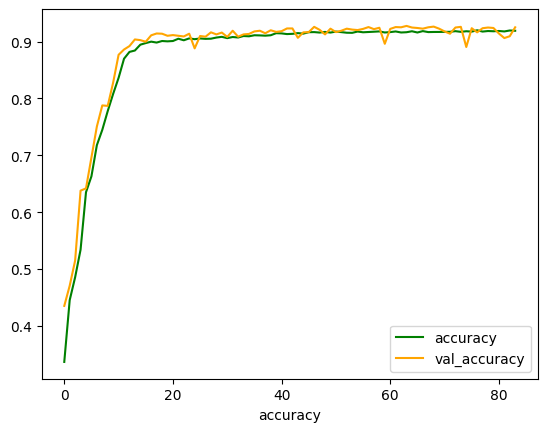

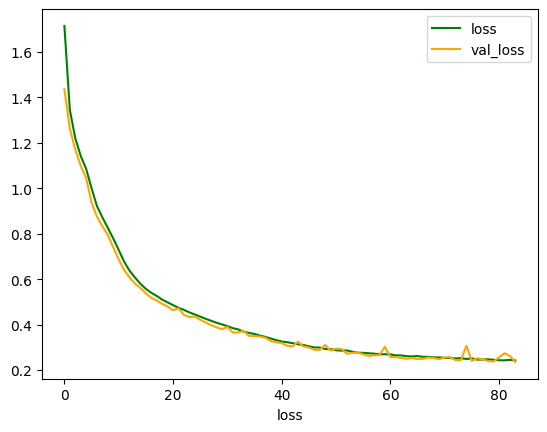

In [97]:
def plot_graphs(history, string):
    plt.plot(history.history[string], color = 'green')
    plt.plot(history.history['val_'+string], color = 'orange')
    plt.xlabel('epoch')
    plt.xlabel(string)
    plt.legend([string, "val_"+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [98]:
evaluation = model.evaluate(X_test1, y_test12)

78/78 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.9275


In [99]:
ann_pred = np.argmax(model.predict(X_test1),axis=1)
ann_pred

78/78 [==============================] - 1s 7ms/step


array([1, 6, 4, ..., 6, 3, 1], dtype=int64)

In [100]:
y_test = np.argmax(y_test12,axis=1)
y_test

array([1, 6, 4, ..., 6, 3, 1], dtype=int64)

In [101]:
print ('accuracy_score: ',accuracy_score(y_test,ann_pred))
print ('f1_score: ',f1_score(y_test,ann_pred, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(y_test,ann_pred, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(y_test,ann_pred, pos_label='positive', average='micro'))

accuracy_score:  0.9275070479258961
f1_score:  0.9275070479258961
recall_score:  0.9275070479258961
precision_score:  0.9275070479258961


In [102]:
print(classification_report(y_test, ann_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       332
           1       1.00      1.00      1.00       377
           2       0.91      0.92      0.92       358
           3       0.93      0.90      0.92       369
           4       0.96      0.92      0.94       346
           5       0.96      0.94      0.95       329
           6       0.84      0.90      0.87       372

    accuracy                           0.93      2483
   macro avg       0.93      0.93      0.93      2483
weighted avg       0.93      0.93      0.93      2483



# simpan model

In [103]:
fillname1="xgboost_model.pkl"
pickle.dump(xgb1, open(fillname1,"wb"))

In [104]:
fillname2="ANN_model.pkl"
pickle.dump(model, open(fillname2,"wb"))

INFO:tensorflow:Assets written to: ram://d15e5e86-71aa-4335-832f-4ff25a4bb6dd/assets


In [107]:
fillname3="MLR_model.pkl"
pickle.dump(logreg1, open(fillname3,"wb"))

In [108]:
fillname4="klaster_model.pkl"
pickle.dump(kmeans, open(fillname4,"wb"))

In [109]:
fillname11="xgboost_model.sav"
pickle.dump(xgb1, open(fillname11,"wb"))

In [110]:
fillname12="ANN_model.sav"
pickle.dump(model, open(fillname12,"wb"))

INFO:tensorflow:Assets written to: ram://3ed4d5ba-438a-433b-b9ef-6df0255030a0/assets


In [111]:
fillname13="MLR_model.sav"
pickle.dump(logreg1, open(fillname13,"wb"))

In [112]:
fillname14="klaster_model.sav"
pickle.dump(kmeans, open(fillname14,"wb"))